# K-Means Clustering for Sections

In [756]:
import re
import glob
import string

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.externals import joblib

from sklearn.cluster import KMeans

In [544]:
list_of_dfs = []

for f in glob.glob('sections/*.csv'):
    list_of_dfs.append(pd.read_csv(f, encoding='utf-8-sig'))

In [545]:
list_of_dfs[0]

,country,iso,gdp,population,year,tariff_f,duty_f,quota_f,voluntary_restraint_f,subsidy_f,...,copyright_lf,countervailing_lf,unfair_lf,fair_trade_lf,trade_facilitation_lf,section_number,section_name,words,paragraphs,text
0,guyana,GUY,3.446266e+09,773303.0,2015,0,0,0,0,0,...,0,0,0,0,0,3.1.1,export documentation and procedures,132,4,"['3.2.1 Export documentation and procedures',..."
1,hong_kong_china,HKG,3.210000e+11,7346700.0,2014,0,0,0,0,0,...,0,0,0,0,0,3.1.1,export documentation and procedures,203,2,"['3.3.1 Export documents and procedures', '3...."


In [546]:
#doc list with section tag
section_text = []
section_names = []

translator = str.maketrans('', '', string.punctuation)

for df in list_of_dfs:
    text = ' '.join(list(df['text'].values))
    
    s = re.sub(r'\d+', '', text)
    ns = s.translate(translator)
    
    section_text.append(' '.join(ns.split()).lower())
    section_names.append(df['section_name'].values[0])

In [547]:
print((section_names[0], section_text[0]))

('export documentation and procedures', 'export documentation and procedures procedures applied to exports are similar to those applied to imports exporters must register with the gra predeparture declarations for exports must be submitted to the gra with the operation of the risk management unit in not all exports are subject to physical inspection except exports to the united states and the united kingdom the presence of a customs officer at exporters premises when containers are loaded is no longer necessary export containers are subject to scanning based on risk profiling when necessary physical inspections are conducted on consignments that are deemed to have high risks implementations of risk profiling have reportedly reduced inspections of shipments there are some additional measures applied to exports of forestry products section there are also facilitation measures provided for exports of perishable goods export documents and procedures an export declaration must be lodged ele

In [752]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(section_text)

In [753]:
tfidf_matrix.shape

(254, 1195)

In [550]:
dist = 1 - cosine_similarity(tfidf_matrix)
dist

array([[ -2.22044605e-16,   9.45618292e-01,   8.81779606e-01, ...,
          9.38979530e-01,   9.53498639e-01,   9.15057439e-01],
       [  9.45618292e-01,   2.22044605e-16,   9.06851294e-01, ...,
          9.38626242e-01,   9.71467680e-01,   8.84017709e-01],
       [  8.81779606e-01,   9.06851294e-01,  -2.22044605e-16, ...,
          8.43827392e-01,   9.69508097e-01,   9.39875055e-01],
       ..., 
       [  9.38979530e-01,   9.38626242e-01,   8.43827392e-01, ...,
         -2.22044605e-16,   9.71559223e-01,   9.38789693e-01],
       [  9.53498639e-01,   9.71467680e-01,   9.69508097e-01, ...,
          9.71559223e-01,   0.00000000e+00,   9.65870918e-01],
       [  9.15057439e-01,   8.84017709e-01,   9.39875055e-01, ...,
          9.38789693e-01,   9.65870918e-01,  -2.22044605e-16]])

>Change "num_clusters" below to designated number.

In [740]:
num_clusters = 50

km = KMeans(n_clusters=num_clusters, random_state=2)

%time km.fit(tfidf_matrix.toarray())

CPU times: user 13.2 s, sys: 704 ms, total: 13.9 s
Wall time: 11.6 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [741]:
clusters = km.labels_.tolist()

In [742]:
sections_dict = {'section_names' : section_names, 'clusters' : clusters}
df = pd.DataFrame(sections_dict, index=[i for i in range(len(clusters))], columns=['section_names', 'clusters'])

In [743]:
df

,section_names,clusters
0,export documentation and procedures,25
1,other charges,43
2,export incentives,13
3,registration customs documents and procedures,3
4,customs procedures and valuation,3
5,export prohibitions authorizations and licensing,48
6,export subsidies promotion and assistance,1
7,prohibitions licensing and controls,16
8,tariffs and other charges affecting imports,18
9,export duty drawback,30


In [744]:
cluster_samples

{0: ['export documentation and procedures',
  'registration customs documents and procedures',
  'customs procedures and valuation'],
 1: ['technical regulations and standards',
  'standards technical requirements and conformity assessment',
  'standards technical regulations and accreditation'],
 2: ['export support'],
 3: ['export duty drawback',
  'export subsidies and inward processing',
  'duty drawback'],
 4: ['competition and consumer policy'],
 5: ['customs levies',
  'other duties and charges',
  'tariffs and excise duties'],
 6: ['export finance and export promotion',
  'export finance and insurance',
  'foreign exchange surrender and conversion requirements'],
 7: ['privatization'],
 8: ['export procedures taxes and restrictions',
  'export procedures taxes and levies',
  'export prohibitions restrictions and controls'],
 9: ['export incentives',
  'export subsidies promotion and assistance',
  'export finance promotion and marketing assistance insurance and guarantees'],
 1

In [745]:
#Note: line directly below is used in visualization only
cluster_samples = {}

order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

c_counter = 0
names = list(df['section_names'].values)
clus = list(df['clusters'].values)

with open('50_cluster.txt', 'w') as f:
    for i in range(num_clusters):
        print("Cluster %d:" % i, end='')
        f.write("Cluster %d:" % i)
    
        s_list = []
    
        for c in range(len(clus)):
            if clus[c] == i:
                print(' %s,' % names[c], end='')
                f.write(' %s,' % names[c])
                s_list.append(names[c])
        
        cluster_samples[c_counter] = s_list[:3]
        c_counter+=1
            
        print('\n')
        f.write('\n\n')
        
f.close()

Cluster 0: export credit insurance and guarantees,

Cluster 1: export subsidies promotion and assistance, export subsidies and inward processing, export subsidies and promotion,

Cluster 2: taxes charges and levies, export duties charges and levies, export taxes charges and levies, export taxes and charges, taxes and other export levies, export taxes fees and charges for services rendered, export taxes and levies, export taxes charges levies and minimum prices, export charges and minimum prices, market values for exports, export duties and taxes, export taxes, export fees,

Cluster 3: registration customs documents and procedures, customs procedures and valuation, customs procedures valuation and requirements, customs procedures and regulations, goods in transit, procedures and documentation, business registration and licensing, dispute settlement and appeals procedures, customs procedures documentation and registration, customs procedures customs valuation and rules of origin, customs

# Visualization

>**NOTE:** We only have 25 colors -- add more if # clusters > 25.

In [724]:
import random

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.decomposition import PCA

pca = PCA(n_components=4, random_state=1)
points = pca.fit_transform(dist)

xs, ys = points[:, 0], points[:, 1]

In [725]:
possible_colors = ['#FA5858', '#B40404', '#610B0B', '#FAAC58', '#DF7401', '#FFFF00',
                   '#AEB404', '#BFFF00', '#86B404', '#80FF00', '#58FAF4', '#086A87',
                   '#2E64FE', '#0404B4', '#8258FA', '#4B088A', '#FF00FF', '#B4045F',
                   '#FA58D0', '#A4A4A4', '#000000', '#886A08', '#A9F5BC', '#F5A9A9',
                   '#E0E6F8']
 
#names are the dict from above: cluster_samples
cluster_colors = {}

prev_picks = []
counter = 0
while len(cluster_colors) < num_clusters:
    pick_random = random.randint(a=0, b=len(possible_colors)-1)
    if pick_random not in prev_picks:
        cluster_colors[counter] = possible_colors[pick_random]
        prev_picks.append(pick_random)
        counter += 1

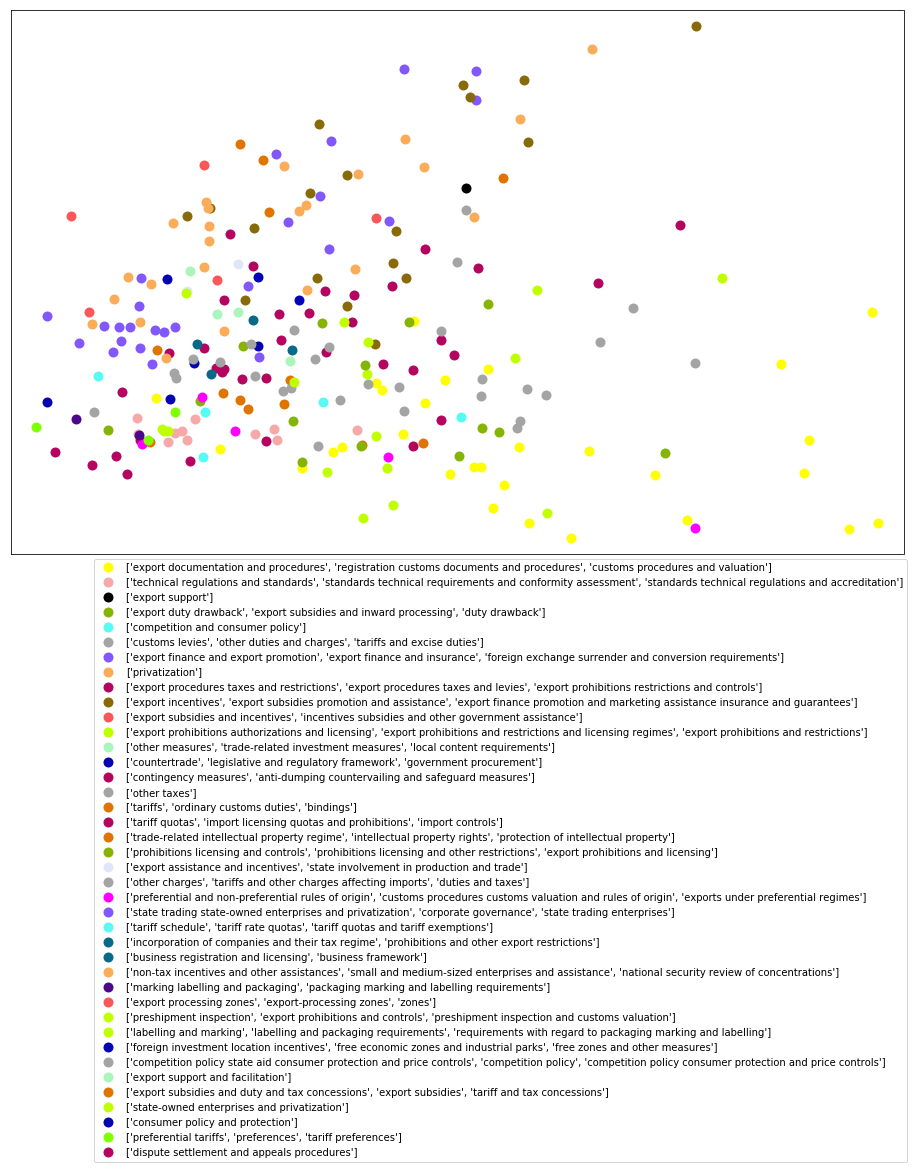

In [726]:
%matplotlib inline 
df_vals = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=section_names)) 
groups = df_vals.groupby('label')

fig, ax = plt.subplots(figsize=(16, 10))
ax.margins(0.03)

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, 
            label=cluster_samples[name], color=cluster_colors[name], mec='none')
    
    ax.set_aspect('auto')
    ax.tick_params(bottom='off', top='off', labelbottom='off')
    ax.tick_params(left='off', top='off', labelleft='off')
    
plt.legend(bbox_to_anchor=(1.01, 0))

plt.savefig('25_cluster.png', bbox_inches='tight')
    
plt.show()

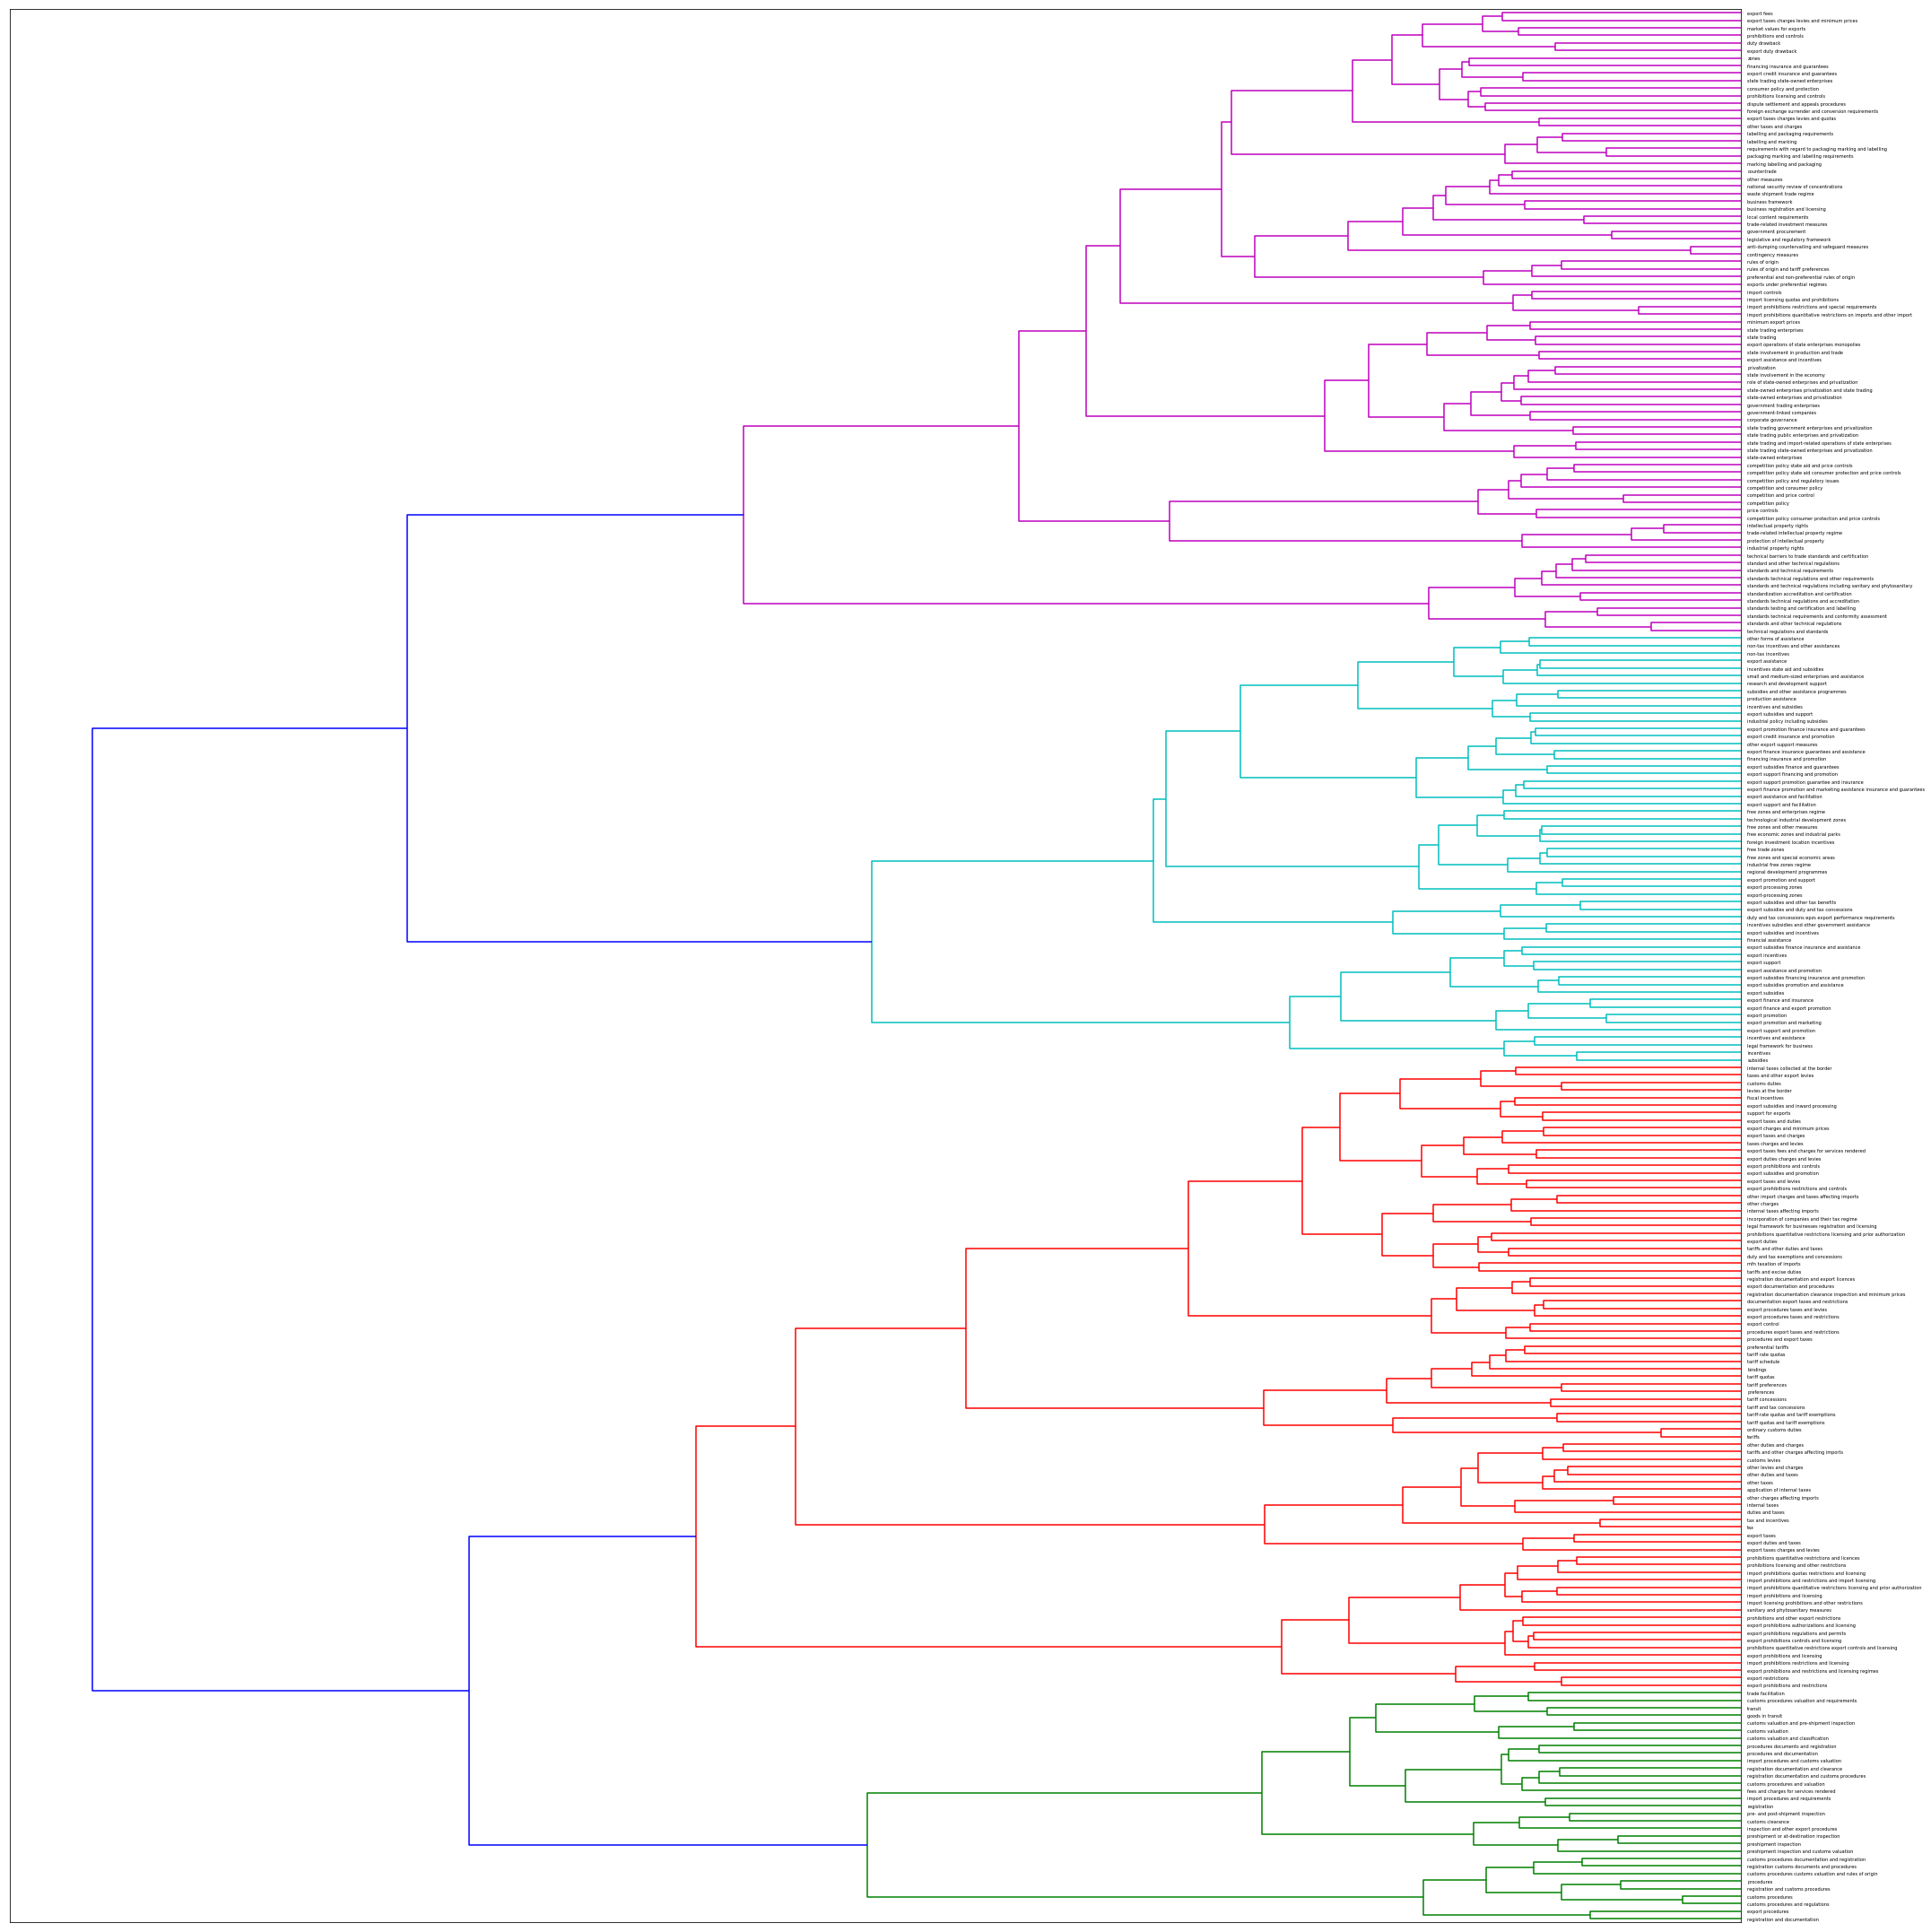

In [747]:
from scipy.cluster.hierarchy import ward, dendrogram

link = ward(dist)

fig, ax = plt.subplots(figsize=(30, 30)) 
ax = dendrogram(link, orientation='left', labels=section_names);

plt.tick_params(bottom='off', top='off', labelbottom='off')

plt.tight_layout() 

plt.savefig('ward_clusters.png', dpi=300) 